In [1]:
import pandorasat as ps
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
plt.style.use('seaborn-white')

In [2]:
nirda = ps.PandoraSat.NIRDA
visda = ps.PandoraSat.VISDA

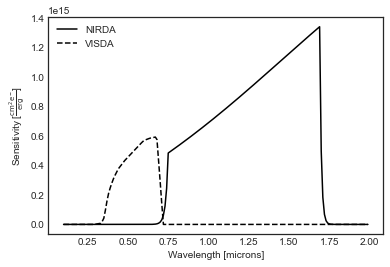

In [3]:
w = np.arange(0.1, 2, 0.01) * u.micron
fig, ax = plt.subplots()
ax.plot(w, nirda.sensitivity(w), label='NIRDA', c='k', ls='-')
ax.plot(w, visda.sensitivity(w), label='VISDA', c='k', ls='--')
ax.set(xlabel='Wavelength [microns]', ylabel=f"Sensitivity [{nirda.sensitivity(w).unit.to_string('latex')}]")
plt.legend()

You can either get a target from vizier

In [9]:
target = ps.Target('GJ 436').from_vizier()

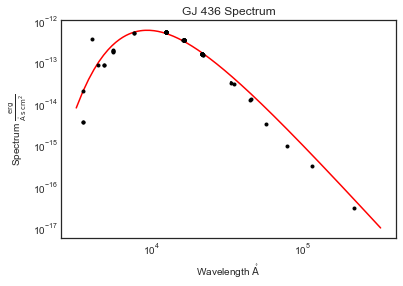

In [10]:
target.plot_spectrum();

Or phoenix models

In [11]:
target = ps.Target('GJ 436').from_phoenix()

In [12]:
trace = nirda.get_trace(target)

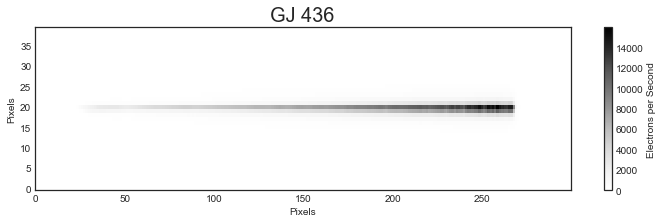

In [13]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(12, 3))
    plt.pcolormesh(np.arange(trace.shape[1]), np.arange(trace.shape[0]), trace.value)
    cbar = plt.colorbar()
    cbar.set_label("Electrons per Second")
    plt.title('GJ 436', fontsize=20)
    ax.set(xlabel='Pixels', ylabel='Pixels')

We can evaluate the PRF of either detector

In [14]:
visda.psf

4D PSF Model [x, y, wavelength, temperature]

TypeError: Dimensions of C (30, 28) are incompatible with X (30) and/or Y (28); see help(pcolormesh)

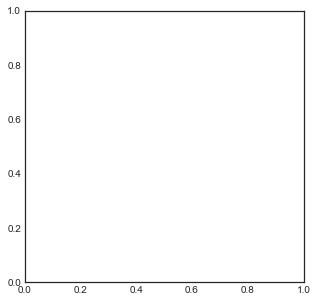

In [16]:
# Point to evaluate the PRF at
point = (600*u.pixel, 600*u.pixel, 0.4*u.micron, -7*u.deg_C)
plt.figure(figsize=(5, 5))
plt.pcolormesh(*visda.psf.prf(point), vmin=0, vmax=0.01)

In [25]:
nirda.psf

1D PSF Model [wavelength]

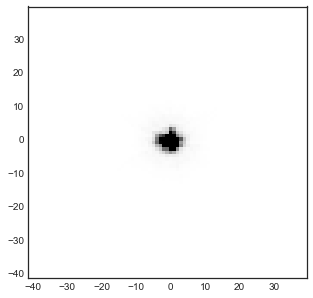

In [29]:
# Point to evaluate the PRF at
point = (1.4*u.micron)
plt.figure(figsize=(5, 5))
plt.pcolormesh(*nirda.psf.prf(point, location=(0*u.pixel, 0*u.pixel)), vmin=0, vmax=0.01)

You can look at some diagnostic plots of the PSF and PRF at different wavelengths and temperatures

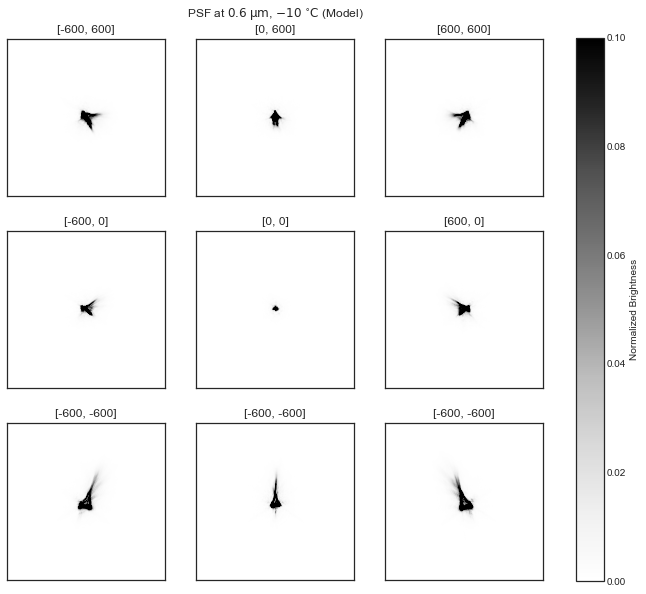

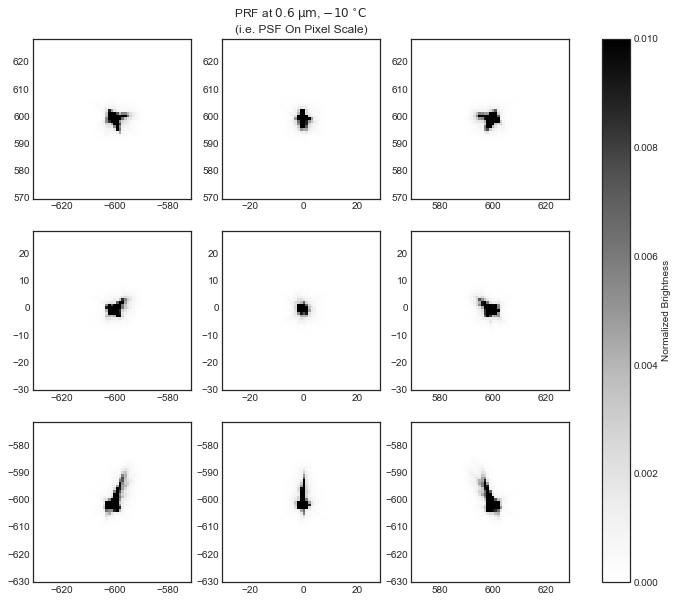

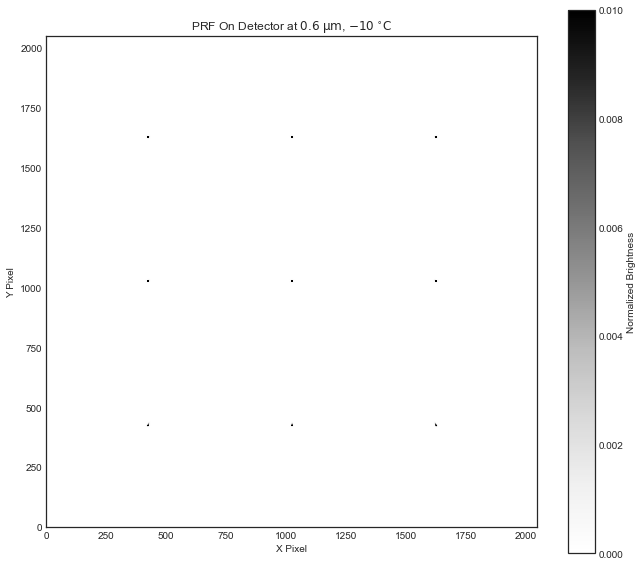

In [30]:
visda.diagnose_psf(wavelength=0.6*u.micron, temperature=-10*u.deg_C);